In [1]:
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

from functions.augmentation import get_augmentation_layers
from functions.model_running import run_model
from functions.plotting import plot_single_output_history
WIDTH = 150
HEIGHT = 150

In [2]:
base_data1_dir = os.path.join(
    '..',
    '..',
    '..',
    'data_1_and_3_no_nv')
train_data1_dir = os.path.join(base_data1_dir, 'training')
valid_data1_dir = os.path.join(base_data1_dir, 'validation')

train1_ds = keras.utils.image_dataset_from_directory(
    directory=train_data1_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(HEIGHT, WIDTH))
valid1_ds = keras.utils.image_dataset_from_directory(
    directory=valid_data1_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(HEIGHT, WIDTH))

Found 4295 files belonging to 9 classes.
Found 1069 files belonging to 9 classes.


In [3]:
data_augmentation = get_augmentation_layers()
train1_ds = train1_ds\
    .cache()\
    .shuffle(1000)\
    .map(lambda x, y: (data_augmentation(x), y))\
    .prefetch(buffer_size=tf.data.AUTOTUNE)
valid1_ds = valid1_ds\
    .cache()\
    .prefetch(buffer_size=tf.data.AUTOTUNE)

In [4]:
num_classes = 9

In [5]:
def get_basic_model() -> keras.Model:
    base_model = InceptionResNetV2(
        include_top=False,
        weights='imagenet',
        input_shape=(HEIGHT, WIDTH, 3))
    flat = keras.layers.Flatten()(base_model.output)
    locator_module = keras.layers.Dense(2048, activation='relu')(flat)
    locator_module = keras.layers.Dropout(.3)(locator_module)
    locator_module = keras.layers.Dense(num_classes, activation='softmax')(locator_module)
    model = keras.Model(base_model.input, outputs=locator_module)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [6]:
history0 = run_model(
    train1_ds,
    valid1_ds,
    get_basic_model,
    os.path.join('..', '..', 'models', 'inception_resnet_data_1_and_3_no_nv_v2_0_{epoch}'),
    os.path.join('..', '..', 'tensor_logs', 'inception_resnet_data_1_and_3_no_nv_v2_0'))

Epoch 1/100
135/135 [==============================] - ETA: 0s - loss: 2.4815 - accuracy: 0.4075

INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_0_1\assets


INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_0_1\assets


135/135 [==============================] - 119s 730ms/step - loss: 2.4815 - accuracy: 0.4075 - val_loss: 1.5392 - val_accuracy: 0.3658 - lr: 0.0010
Epoch 2/100
135/135 [==============================] - ETA: 0s - loss: 1.4434 - accuracy: 0.4913

INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_0_2\assets


INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_0_2\assets


135/135 [==============================] - 94s 694ms/step - loss: 1.4434 - accuracy: 0.4913 - val_loss: 1.4357 - val_accuracy: 0.5173 - lr: 0.0010
Epoch 3/100
135/135 [==============================] - 33s 238ms/step - loss: 1.2099 - accuracy: 0.5455 - val_loss: 2.3443 - val_accuracy: 0.4659 - lr: 0.0010
Epoch 4/100
135/135 [==============================] - ETA: 0s - loss: 1.0481 - accuracy: 0.5921

INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_0_4\assets


INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_0_4\assets


135/135 [==============================] - 95s 710ms/step - loss: 1.0481 - accuracy: 0.5921 - val_loss: 1.1313 - val_accuracy: 0.5716 - lr: 0.0010
Epoch 5/100
135/135 [==============================] - ETA: 0s - loss: 1.0096 - accuracy: 0.6000

INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_0_5\assets


INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_0_5\assets


135/135 [==============================] - 96s 708ms/step - loss: 1.0096 - accuracy: 0.6000 - val_loss: 1.0377 - val_accuracy: 0.5931 - lr: 0.0010
Epoch 6/100
135/135 [==============================] - 34s 250ms/step - loss: 0.9308 - accuracy: 0.6403 - val_loss: 1.2460 - val_accuracy: 0.5575 - lr: 0.0010
Epoch 7/100
135/135 [==============================] - 34s 252ms/step - loss: 0.9103 - accuracy: 0.6477 - val_loss: 1.3981 - val_accuracy: 0.5875 - lr: 0.0010
Epoch 8/100
135/135 [==============================] - ETA: 0s - loss: 0.8885 - accuracy: 0.6666

INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_0_8\assets


INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_0_8\assets


135/135 [==============================] - 97s 722ms/step - loss: 0.8885 - accuracy: 0.6666 - val_loss: 0.9578 - val_accuracy: 0.6408 - lr: 0.0010
Epoch 9/100
135/135 [==============================] - ETA: 0s - loss: 0.8410 - accuracy: 0.6789

INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_0_9\assets


INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_0_9\assets


135/135 [==============================] - 97s 718ms/step - loss: 0.8410 - accuracy: 0.6789 - val_loss: 0.9867 - val_accuracy: 0.6436 - lr: 0.0010
Epoch 10/100
135/135 [==============================] - 34s 248ms/step - loss: 0.8101 - accuracy: 0.6943 - val_loss: 0.9626 - val_accuracy: 0.6436 - lr: 0.0010
Epoch 11/100
135/135 [==============================] - 34s 249ms/step - loss: 0.8094 - accuracy: 0.6950 - val_loss: 1.0109 - val_accuracy: 0.6118 - lr: 0.0010
Epoch 12/100
135/135 [==============================] - 34s 250ms/step - loss: 0.7858 - accuracy: 0.6983 - val_loss: 4733.9468 - val_accuracy: 0.3471 - lr: 0.0010
Epoch 13/100
135/135 [==============================] - 34s 252ms/step - loss: 0.9062 - accuracy: 0.6412 - val_loss: 222.6172 - val_accuracy: 0.2432 - lr: 0.0010
Epoch 14/100
135/135 [==============================] - ETA: 0s - loss: 0.9620 - accuracy: 0.6366
Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0009500000451225787.
135/135 [========================

INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_0_16\assets


INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_0_16\assets


135/135 [==============================] - 100s 743ms/step - loss: 0.8504 - accuracy: 0.6692 - val_loss: 0.8738 - val_accuracy: 0.6642 - lr: 9.5000e-04
Epoch 17/100
135/135 [==============================] - 35s 257ms/step - loss: 0.8097 - accuracy: 0.6875 - val_loss: 1.2489 - val_accuracy: 0.4911 - lr: 9.5000e-04
Epoch 18/100
135/135 [==============================] - ETA: 0s - loss: 0.7664 - accuracy: 0.7069

INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_0_18\assets


INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_0_18\assets


135/135 [==============================] - 98s 726ms/step - loss: 0.7664 - accuracy: 0.7069 - val_loss: 0.8194 - val_accuracy: 0.6857 - lr: 9.5000e-04
Epoch 19/100
135/135 [==============================] - 35s 257ms/step - loss: 0.7519 - accuracy: 0.7090 - val_loss: 0.9110 - val_accuracy: 0.6604 - lr: 9.5000e-04
Epoch 20/100
135/135 [==============================] - 35s 256ms/step - loss: 0.7437 - accuracy: 0.7115 - val_loss: 0.8343 - val_accuracy: 0.6829 - lr: 9.5000e-04
Epoch 21/100
135/135 [==============================] - 35s 255ms/step - loss: 0.6801 - accuracy: 0.7341 - val_loss: 0.8405 - val_accuracy: 0.6829 - lr: 9.5000e-04
Epoch 22/100
135/135 [==============================] - 35s 257ms/step - loss: 0.7097 - accuracy: 0.7315 - val_loss: 0.9117 - val_accuracy: 0.6586 - lr: 9.5000e-04
Epoch 23/100
135/135 [==============================] - ETA: 0s - loss: 0.6588 - accuracy: 0.7439
Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0009025000152178108.
135/135 [=========

INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_0_25\assets


INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_0_25\assets


135/135 [==============================] - 98s 727ms/step - loss: 0.6530 - accuracy: 0.7446 - val_loss: 0.7876 - val_accuracy: 0.6932 - lr: 9.0250e-04
Epoch 26/100
135/135 [==============================] - 36s 261ms/step - loss: 0.6190 - accuracy: 0.7688 - val_loss: 0.9984 - val_accuracy: 0.6314 - lr: 9.0250e-04
Epoch 27/100
135/135 [==============================] - 35s 261ms/step - loss: 0.6619 - accuracy: 0.7362 - val_loss: 3.5230 - val_accuracy: 0.5491 - lr: 9.0250e-04
Epoch 28/100
135/135 [==============================] - 34s 255ms/step - loss: 0.8451 - accuracy: 0.6747 - val_loss: 0.9157 - val_accuracy: 0.6698 - lr: 9.0250e-04
Epoch 29/100
135/135 [==============================] - 35s 256ms/step - loss: 0.6809 - accuracy: 0.7357 - val_loss: 0.8683 - val_accuracy: 0.6698 - lr: 9.0250e-04
Epoch 30/100
135/135 [==============================] - ETA: 0s - loss: 0.6299 - accuracy: 0.7583

INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_0_30\assets


INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_0_30\assets


135/135 [==============================] - 95s 706ms/step - loss: 0.6299 - accuracy: 0.7583 - val_loss: 0.7839 - val_accuracy: 0.7138 - lr: 9.0250e-04
Epoch 31/100
135/135 [==============================] - 35s 254ms/step - loss: 0.9051 - accuracy: 0.6433 - val_loss: 49.7317 - val_accuracy: 0.4228 - lr: 9.0250e-04
Epoch 32/100
135/135 [==============================] - 34s 255ms/step - loss: 0.8389 - accuracy: 0.6689 - val_loss: 1.7667 - val_accuracy: 0.4818 - lr: 9.0250e-04
Epoch 33/100
135/135 [==============================] - 35s 259ms/step - loss: 0.9286 - accuracy: 0.6431 - val_loss: 1.7679 - val_accuracy: 0.3461 - lr: 9.0250e-04
Epoch 34/100
135/135 [==============================] - 35s 258ms/step - loss: 1.0404 - accuracy: 0.6023 - val_loss: 1.5530 - val_accuracy: 0.5323 - lr: 9.0250e-04
Epoch 35/100
135/135 [==============================] - ETA: 0s - loss: 0.9921 - accuracy: 0.6205
Epoch 35: ReduceLROnPlateau reducing learning rate to 0.0008573750033974647.
135/135 [========

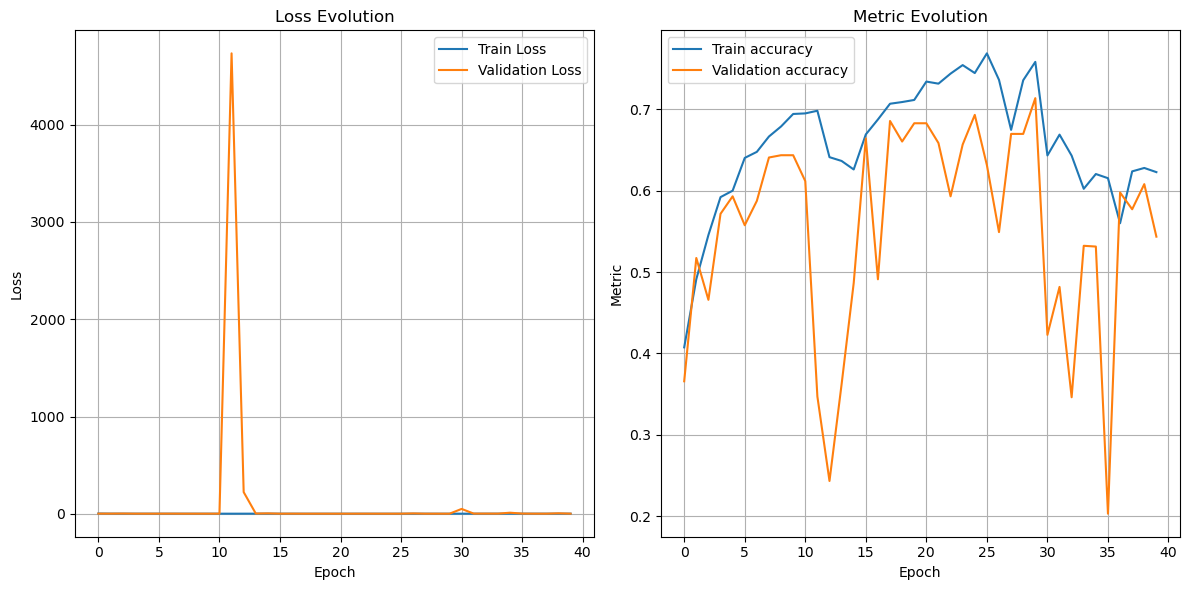

In [8]:
plot_single_output_history(history0.history)

In [9]:
def get_model_partly_frozen() -> keras.Model:
    base_model = InceptionResNetV2(
        include_top=False,
        weights='imagenet',
        input_shape=(HEIGHT, WIDTH, 3))

    for cnt in range(len(base_model.layers) // 2, len(base_model.layers)):
        base_model.layers[cnt].trainable = False

    flat = keras.layers.Flatten()(base_model.output)
    locator_module = keras.layers.Dense(4608, activation='relu')(flat)
    locator_module = keras.layers.Dropout(.3)(locator_module)
    locator_module = keras.layers.Dense(2048, activation='relu')(locator_module)
    locator_module = keras.layers.Dropout(.3)(locator_module)
    locator_module = keras.layers.Dense(num_classes, activation='softmax')(locator_module)
    model = keras.Model(base_model.input, outputs=locator_module)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [10]:
history1 = run_model(
    train1_ds,
    valid1_ds,
    get_model_partly_frozen,
    os.path.join('..', '..', 'models', 'inception_resnet_data_1_and_3_no_nv_v2_1_{epoch}'),
    os.path.join('..', '..', 'tensor_logs', 'inception_resnet_data_1_and_3_no_nv_v2_1'))

Epoch 1/100
135/135 [==============================] - ETA: 0s - loss: 3.3118 - accuracy: 0.3420

INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_1_1\assets


INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_1_1\assets


135/135 [==============================] - 110s 724ms/step - loss: 3.3118 - accuracy: 0.3420 - val_loss: 1.7524 - val_accuracy: 0.3414 - lr: 0.0010
Epoch 2/100
135/135 [==============================] - ETA: 0s - loss: 1.3434 - accuracy: 0.4638

INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_1_2\assets


INFO:tensorflow:Assets written to: ..\..\models\inception_resnet_data_1_and_3_no_nv_v2_1_2\assets


135/135 [==============================] - 97s 718ms/step - loss: 1.3434 - accuracy: 0.4638 - val_loss: 1.2966 - val_accuracy: 0.4509 - lr: 0.0010
Epoch 3/100
 87/135 [==================>...........] - ETA: 12s - loss: 1.2235 - accuracy: 0.5180

In [11]:
plot_single_output_history(history1.history)

In [12]:
def get_model_with_attention() -> keras.Model:
    def get_attention_module(prev: keras.layers.Layer) -> keras.layers.Layer:
        gap_layer = keras.layers.GlobalAveragePooling2D()(prev)
        gap_layer_res = keras.layers.Reshape((1, 1, 1536))(gap_layer)
        dense = keras.layers.Dense(1536, activation='relu')(gap_layer_res)
        dense = keras.layers.Dense(1536, activation='softmax')(dense)
        mul_layer = keras.layers.Multiply()([prev, dense])

        return mul_layer

    base_model = InceptionResNetV2(
        include_top=False,
        weights='imagenet',
        input_shape=(HEIGHT, WIDTH, 3))
    attention_module = get_attention_module(base_model.output)
    flat = keras.layers.Flatten()(attention_module)
    locator_module = keras.layers.Dense(2048, activation='relu')(flat)
    locator_module = keras.layers.Dropout(.3)(locator_module)
    locator_module = keras.layers.Dense(num_classes, activation='softmax')(locator_module)
    model = keras.Model(base_model.input, outputs=locator_module)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [13]:
history2 = run_model(
    train1_ds,
    valid1_ds,
    get_model_with_attention,
    os.path.join('..', '..', 'models', 'inception_resnet_data_1_and_3_no_nv_v2_2_{epoch}'),
    os.path.join('..', '..', 'tensor_logs', 'inception_resnet_data_1_and_3_no_nv_v2_2'))

In [14]:
plot_single_output_history(history2.history)

In [16]:
import numpy as np

np.save(os.path.join('..', '..', 'histories', 'inception_resnet_data_1_and_3_no_nv_v2_0.npy'), history0.history)
np.save(os.path.join('..', '..', 'histories', 'inception_resnet_data_1_and_3_no_nv_v2_1.npy'), history1.history)
np.save(os.path.join('..', '..', 'histories', 'inception_resnet_data_1_and_3_no_nv_v2_2.npy'), history2.history)

# history1=np.load('history1.npy',allow_pickle='TRUE').item()